https://machinelearningmastery.com/lstm-autoencoders/

In [1]:
# LSTM Autoencoder predict sequence
from numpy import array

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.utils import plot_model

In [2]:
# Define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [3]:
# Reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))

In [4]:
# Prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1

In [5]:
# Define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))

In [6]:
model.compile(optimizer='adam', loss='mse')

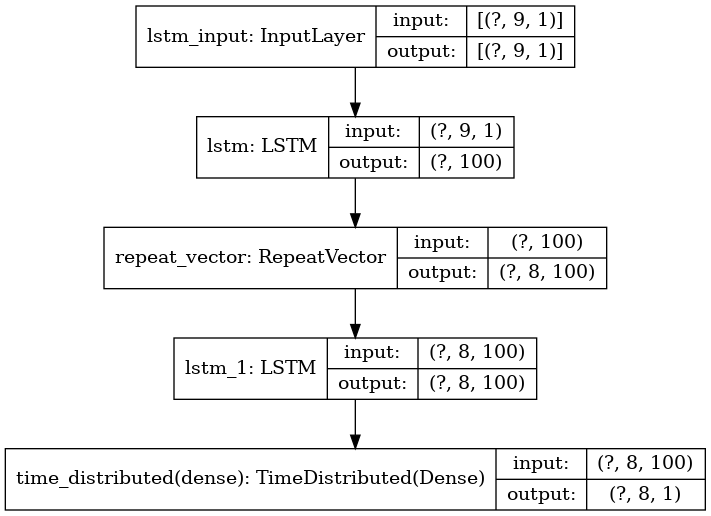

In [7]:
plot_model(model, show_shapes=True, to_file='predict_lstm_autoencoder.png')

In [8]:
# Fit model
model.fit(seq_in, seq_out, epochs=3000, verbose=0)

In [9]:
# Demonstrate recreation
yhat = model.predict(seq_in, verbose=0)
print(yhat[0,:,0])

[0.19999112 0.30012015 0.39973423 0.5000296  0.60014915 0.7000598
 0.79989016 0.900015  ]
